In [1]:
import pandas as pd
import numpy as np
cctv = pd.read_csv('./교통/전국cctv표준데이터.csv', encoding='euc-kr')
acc = pd.read_csv('./교통/도로교통공단_교통사고다발지역_20190725.csv', encoding='euc-kr')
pop = pd.read_csv('./교통/201907_201907_주민등록인구및세대현황_월간.csv', encoding='euc-kr')

cctv.rename(columns = {cctv.columns[2]:'지역'}, inplace = True)
cctv = cctv[['소재지도로명주소','지역', '카메라대수']]
cctv['지역'] = cctv['지역'].str.slice(0,4)
cctv['소재지도로명주소'] = cctv['소재지도로명주소'].str.slice(0,4)

loc = {'경상북도':'경북','강원도 ':'강원','경기도 ':'경기','경상남도':'경남','경상북도':'경북','부산광역':'부산',
       '서울특별':'서울','울산광역':'울산','인천광역':'인천','충청남도':'충남','충청북도':'충북',
       '전라남도':'전남','전라북도':'전북','대전광역':'대전','제주특별':'제주','대구광역':'대구','광주광역':'광주',
       '세종특별':'세종', '미분류 ':'제주'}

cctv['지역']= cctv['지역'].apply(lambda v: loc.get(v,v))
cctv['소재지도로명주소']= cctv['소재지도로명주소'].apply(lambda v: loc.get(v,v))

aa= cctv['지역'].isnull()
cctv.loc[aa,"지역"] = cctv.loc[aa,'소재지도로명주소']

cctv.drop(['소재지도로명주소'], axis = 1, inplace = True)
cctv = pd.pivot_table(cctv, index = '지역', values ='카메라대수', aggfunc=np.sum)

cctv

,카메라대수
지역,
강원,12653
경기,107835
경남,23077
경북,24334
광주,5227
대구,12521
대전,4349
부산,11036
서울,54584


In [2]:
acc.rename(columns = {acc.columns[5]:"지역"}, inplace = True)
acc["지역"] = acc["지역"].str.slice(0,4)

acc['지역'] = acc['지역'].apply(lambda v: loc.get(v, v))
acc = acc[['지역','발생건수','사상자수']]
acc = pd.pivot_table(acc, index = '지역', values =('발생건수','사상자수'), aggfunc=np.sum)
acc['사상자 비율'] = round(acc['사상자수']/acc['발생건수'],2)

In [3]:
# 데이터 합치기
result = pd.concat([cctv,acc], axis =1)
result

,카메라대수,발생건수,사상자수,사상자 비율
지역,,,,
강원,12653,898,940,1.05
경기,107835,8631,9089,1.05
경남,23077,2196,2316,1.05
경북,24334,2234,2326,1.04
광주,5227,1393,1472,1.06
대구,12521,5039,5298,1.05
대전,4349,1358,1448,1.07
부산,11036,3476,3666,1.05
서울,54584,14490,15432,1.07


In [4]:
pop.rename(columns = {pop.columns[0]:"지역",pop.columns[1]:'인구수'}, inplace = True)
pop = pop[['지역','인구수']]
loc = {"서울특별시  (1100000000)":"서울", "부산광역시  (2600000000)":"부산","대구광역시  (2700000000)":"대구",
       "인천광역시  (2800000000)":"인천", "광주광역시  (2900000000)":"광주","대전광역시  (3000000000)":"대전",
      "울산광역시  (3100000000)":"울산","세종특별자치시  (3600000000)":"세종","경기도  (4100000000)":"경기",
       "강원도  (4200000000)":"강원","충청북도  (4300000000)":"충북", "충청남도  (4400000000)":"충남","전라북도  (4500000000)":
      "전북","전라남도  (4600000000)":"전남","경상북도  (4700000000)":"경북","경상남도  (4800000000)":"경남",
      "제주특별자치도  (5000000000)":"제주"}
pop['지역'] = pop['지역'].apply(lambda v: loc.get(v, v))

result = pd.merge(result,pop, on='지역')
result

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수
0,강원,12653,898,940,1.05,"1,540,714"
1,경기,107835,8631,9089,1.05,"13,176,011"
2,경남,23077,2196,2316,1.05,"3,366,286"
3,경북,24334,2234,2326,1.04,"2,668,836"
4,광주,5227,1393,1472,1.06,"1,459,486"
5,대구,12521,5039,5298,1.05,"2,448,666"
6,대전,4349,1358,1448,1.07,"1,481,701"
7,부산,11036,3476,3666,1.05,"3,425,317"
8,서울,54584,14490,15432,1.07,"9,751,415"
9,세종,1819,42,46,1.10,"330,298"


In [5]:
car = pd.read_excel('./교통/2019년_07월_자동차_등록자료_통계.xlsx', usecols='A,V', header = 4)
car.rename(columns = {car.columns[0]:'지역',car.columns[1]:'등록차량수'}, inplace = True)
result = pd.merge(result, car, on='지역')

In [15]:
result.index = result['지역']
result = result.drop(['지역'], axis = 1)
result

,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수
지역,,,,,,
강원,12653,898,940,1.05,"1,540,714",777558
경기,107835,8631,9089,1.05,"13,176,011",5710355
경남,23077,2196,2316,1.05,"3,366,286",1711514
경북,24334,2234,2326,1.04,"2,668,836",1437795
광주,5227,1393,1472,1.06,"1,459,486",672166
대구,12521,5039,5298,1.05,"2,448,666",1182351
대전,4349,1358,1448,1.07,"1,481,701",671788
부산,11036,3476,3666,1.05,"3,425,317",1385252
서울,54584,14490,15432,1.07,"9,751,415",3121140


In [6]:
result['등록차량수별사고발생비율'] = result['발생건수']/result['등록차량수']
result

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율
0,강원,12653,898,940,1.05,"1,540,714",777558,0.001155
1,경기,107835,8631,9089,1.05,"13,176,011",5710355,0.001511
2,경남,23077,2196,2316,1.05,"3,366,286",1711514,0.001283
3,경북,24334,2234,2326,1.04,"2,668,836",1437795,0.001554
4,광주,5227,1393,1472,1.06,"1,459,486",672166,0.002072
5,대구,12521,5039,5298,1.05,"2,448,666",1182351,0.004262
6,대전,4349,1358,1448,1.07,"1,481,701",671788,0.002021
7,부산,11036,3476,3666,1.05,"3,425,317",1385252,0.002509
8,서울,54584,14490,15432,1.07,"9,751,415",3121140,0.004643
9,세종,1819,42,46,1.10,"330,298",157498,0.000267


In [7]:
result['cctv대수별사고발생비율'] = result['발생건수']/result['카메라대수']
result

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율,cctv대수별사고발생비율
0,강원,12653,898,940,1.05,"1,540,714",777558,0.001155,0.070971
1,경기,107835,8631,9089,1.05,"13,176,011",5710355,0.001511,0.080039
2,경남,23077,2196,2316,1.05,"3,366,286",1711514,0.001283,0.095160
3,경북,24334,2234,2326,1.04,"2,668,836",1437795,0.001554,0.091806
4,광주,5227,1393,1472,1.06,"1,459,486",672166,0.002072,0.266501
5,대구,12521,5039,5298,1.05,"2,448,666",1182351,0.004262,0.402444
6,대전,4349,1358,1448,1.07,"1,481,701",671788,0.002021,0.312256
7,부산,11036,3476,3666,1.05,"3,425,317",1385252,0.002509,0.314969
8,서울,54584,14490,15432,1.07,"9,751,415",3121140,0.004643,0.265462
9,세종,1819,42,46,1.10,"330,298",157498,0.000267,0.023090


In [8]:
result['인구수'] = result['인구수'].str.replace(',','').astype('int64')
result

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율,cctv대수별사고발생비율
0,강원,12653,898,940,1.05,1540714,777558,0.001155,0.070971
1,경기,107835,8631,9089,1.05,13176011,5710355,0.001511,0.080039
2,경남,23077,2196,2316,1.05,3366286,1711514,0.001283,0.095160
3,경북,24334,2234,2326,1.04,2668836,1437795,0.001554,0.091806
4,광주,5227,1393,1472,1.06,1459486,672166,0.002072,0.266501
5,대구,12521,5039,5298,1.05,2448666,1182351,0.004262,0.402444
6,대전,4349,1358,1448,1.07,1481701,671788,0.002021,0.312256
7,부산,11036,3476,3666,1.05,3425317,1385252,0.002509,0.314969
8,서울,54584,14490,15432,1.07,9751415,3121140,0.004643,0.265462
9,세종,1819,42,46,1.10,330298,157498,0.000267,0.023090


In [9]:
result['인구수정규화'] = result['인구수']/max(result['인구수'])*10000

In [10]:
result['발생건수정규화'] = result['발생건수']/max(result['발생건수'])

In [11]:
result['카메라대수정규화'] = result['카메라대수']/max(result['카메라대수'])

In [12]:
result['인구대비사고발생건수'] = result['발생건수']/(result['인구수']/100000)

In [13]:
result['위도'] = [37.8228,37.4138,35.4606,36.4919,36.348315,35.848987,35.194012, 33.348885, 37.487935,36.2915,35.5384,37.4563,34.8679,35.7175,33.4996,36.5184,36.8000]
result['경도'] = [128.1555,127.5183,128.2132,128.8889,127.390594,128.72818,128.101959, 126.280975, 126.857758,127.28167,129.3114,126.7052,126.9910,127.1530,126.5312,126.8000,127.7000]

In [14]:
result

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율,cctv대수별사고발생비율,인구수정규화,발생건수정규화,카메라대수정규화,인구대비사고발생건수,위도,경도
0,강원,12653,898,940,1.05,1540714,777558,0.001155,0.070971,1169.332661,0.061974,0.117337,58.284665,37.822800,128.155500
1,경기,107835,8631,9089,1.05,13176011,5710355,0.001511,0.080039,10000.000000,0.595652,1.000000,65.505410,37.413800,127.518300
2,경남,23077,2196,2316,1.05,3366286,1711514,0.001283,0.095160,2554.859737,0.151553,0.214003,65.235099,35.460600,128.213200
3,경북,24334,2234,2326,1.04,2668836,1437795,0.001554,0.091806,2025.526542,0.154175,0.225660,83.706904,36.491900,128.888900
4,광주,5227,1393,1472,1.06,1459486,672166,0.002072,0.266501,1107.684260,0.096135,0.048472,95.444561,36.348315,127.390594
5,대구,12521,5039,5298,1.05,2448666,1182351,0.004262,0.402444,1858.427410,0.347757,0.116113,205.785518,35.848987,128.728180
6,대전,4349,1358,1448,1.07,1481701,671788,0.002021,0.312256,1124.544447,0.093720,0.040330,91.651420,35.194012,128.101959
7,부산,11036,3476,3666,1.05,3425317,1385252,0.002509,0.314969,2599.661612,0.239890,0.102342,101.479659,33.348885,126.280975
8,서울,54584,14490,15432,1.07,9751415,3121140,0.004643,0.265462,7400.885594,1.000000,0.506181,148.593819,37.487935,126.857758
9,세종,1819,42,46,1.10,330298,157498,0.000267,0.023090,250.681333,0.002899,0.016868,12.715790,36.291500,127.281670


## 인구대비 사고건수가 높은 지역은 서울, 대구, 광주이다

In [179]:
# 오름차순
pd_df = result.sort_values(['인구대비사고발생건수']).reset_index(drop=False)
print (pd_df)

    index  지역   카메라대수   발생건수   사상자수  사상자 비율       인구수    등록차량수  등록차량수별사고발생비율  \
0       9  세종    1819     42     46    1.10    330298   157498      0.000267   
1      15  충남   18740    980   1007    1.03   2125349  1109552      0.000883   
2      11  인천   11287   1716   1810    1.05   2956828  1617597      0.001061   
3       0  강원   12653    898    940    1.05   1540714   777558      0.001155   
4       2  경남   23077   2196   2316    1.05   3366286  1711514      0.001283   
5       1  경기  107835   8631   9089    1.05  13176011  5710355      0.001511   
6      12  전남   11516   1342   1418    1.06   1868856  1046210      0.001283   
7      10  울산   12523    867    932    1.07   1150891   563035      0.001540   
8       3  경북   24334   2234   2326    1.04   2668836  1437795      0.001554   
9      16  충북   14744   1464   1573    1.07   1599368   831244      0.001761   
10      6  대전    4349   1358   1448    1.07   1481701   671788      0.002021   
11     13  전북   19719   1728   1785    1

Text(0.5, 1.0, '인구대비')

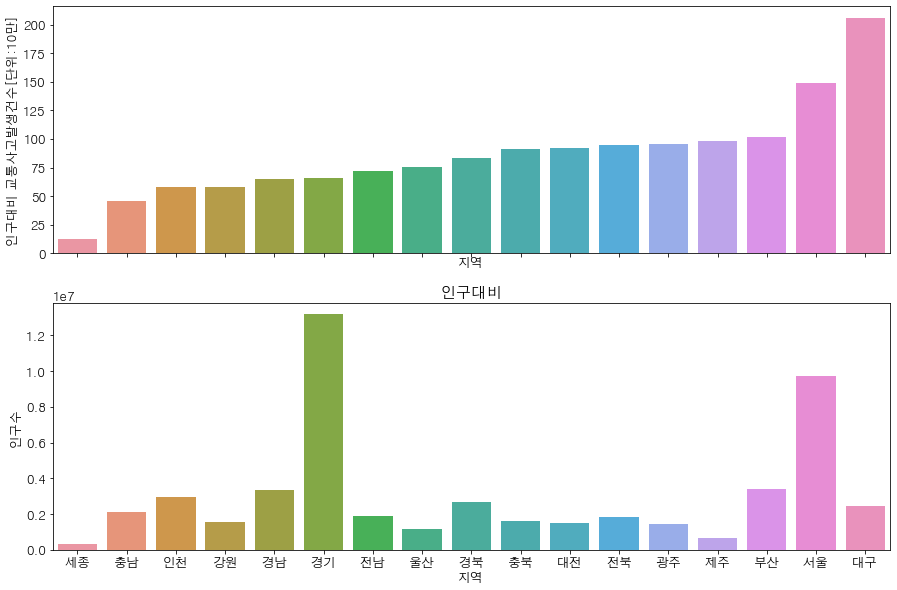

In [180]:
from matplotlib import pyplot as plt
import seaborn as sns
#한글 꺠짐 방지★★★★★★
from matplotlib import font_manager, rc

#fname 위치는 c->windows->fonts->오른쪽 마우스 속성 -> 보안
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/H2GTRM.TTF").get_name() 
rc("font", family = font_name, size = 13)

f, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10), sharex=True)
sns.barplot(x=pd_df.지역,y = pd_df.인구대비사고발생건수, ax=ax1 )
sns.barplot(x=pd_df.지역,y = pd_df.인구수, ax=ax2 )
ax1.set_ylabel('인구대비 교통사고발생건수[단위:10만]')
plt.title('인구대비')

## CCTV 개수가 적은 지역일수록 교통사고에 취약하다고 판단

In [181]:
pd_df = result.sort_values(['cctv대수별사고발생비율']).reset_index(drop=False)
print (pd_df)

    index  지역   카메라대수   발생건수   사상자수  사상자 비율       인구수    등록차량수  등록차량수별사고발생비율  \
0       9  세종    1819     42     46    1.10    330298   157498      0.000267   
1      15  충남   18740    980   1007    1.03   2125349  1109552      0.000883   
2      14  제주   10521    656    675    1.03    670209   579297      0.001132   
3      10  울산   12523    867    932    1.07   1150891   563035      0.001540   
4       0  강원   12653    898    940    1.05   1540714   777558      0.001155   
5       1  경기  107835   8631   9089    1.05  13176011  5710355      0.001511   
6      13  전북   19719   1728   1785    1.03   1825381   926422      0.001865   
7       3  경북   24334   2234   2326    1.04   2668836  1437795      0.001554   
8       2  경남   23077   2196   2316    1.05   3366286  1711514      0.001283   
9      16  충북   14744   1464   1573    1.07   1599368   831244      0.001761   
10     12  전남   11516   1342   1418    1.06   1868856  1046210      0.001283   
11     11  인천   11287   1716   1810    1

Text(0.5, 1.0, '카메라대비')

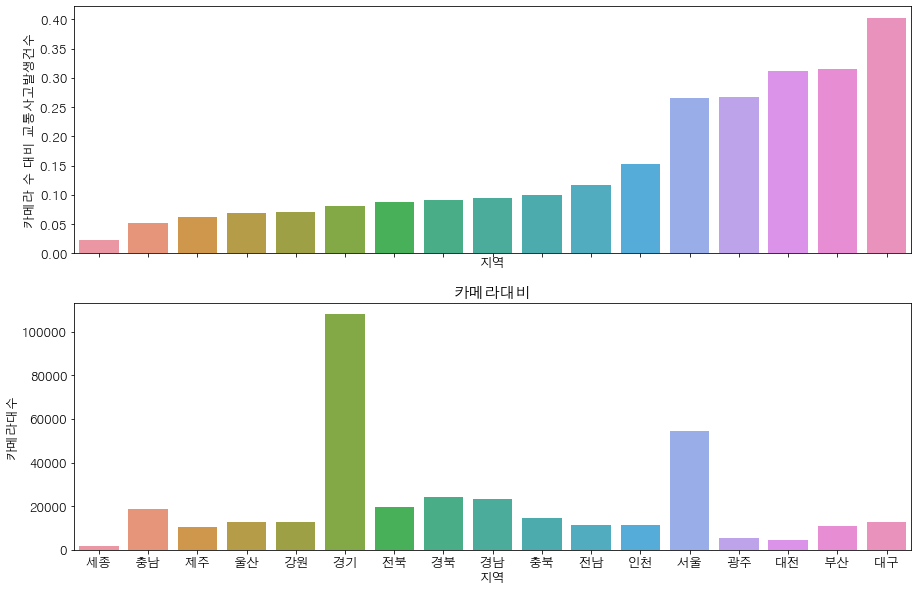

In [182]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10), sharex=True)
sns.barplot(x=pd_df.지역, y=pd_df.cctv대수별사고발생비율, ax=ax1)
sns.barplot(x=pd_df.지역, y=pd_df.카메라대수, ax=ax2)
ax1.set_ylabel('카메라 수 대비 교통사고발생건수')
plt.title('카메라대비')

## 차량수 대비 사고건수가 높은 지역은 대구, 서울, 부산, 광주이다

In [183]:
pd_df = result.sort_values(['등록차량수별사고발생비율']).reset_index(drop=False)
print(pd_df)

    index  지역   카메라대수   발생건수   사상자수  사상자 비율       인구수    등록차량수  등록차량수별사고발생비율  \
0       9  세종    1819     42     46    1.10    330298   157498      0.000267   
1      15  충남   18740    980   1007    1.03   2125349  1109552      0.000883   
2      11  인천   11287   1716   1810    1.05   2956828  1617597      0.001061   
3      14  제주   10521    656    675    1.03    670209   579297      0.001132   
4       0  강원   12653    898    940    1.05   1540714   777558      0.001155   
5      12  전남   11516   1342   1418    1.06   1868856  1046210      0.001283   
6       2  경남   23077   2196   2316    1.05   3366286  1711514      0.001283   
7       1  경기  107835   8631   9089    1.05  13176011  5710355      0.001511   
8      10  울산   12523    867    932    1.07   1150891   563035      0.001540   
9       3  경북   24334   2234   2326    1.04   2668836  1437795      0.001554   
10     16  충북   14744   1464   1573    1.07   1599368   831244      0.001761   
11     13  전북   19719   1728   1785    1

Text(0.5, 1.0, '차량수대비 사고발생건')

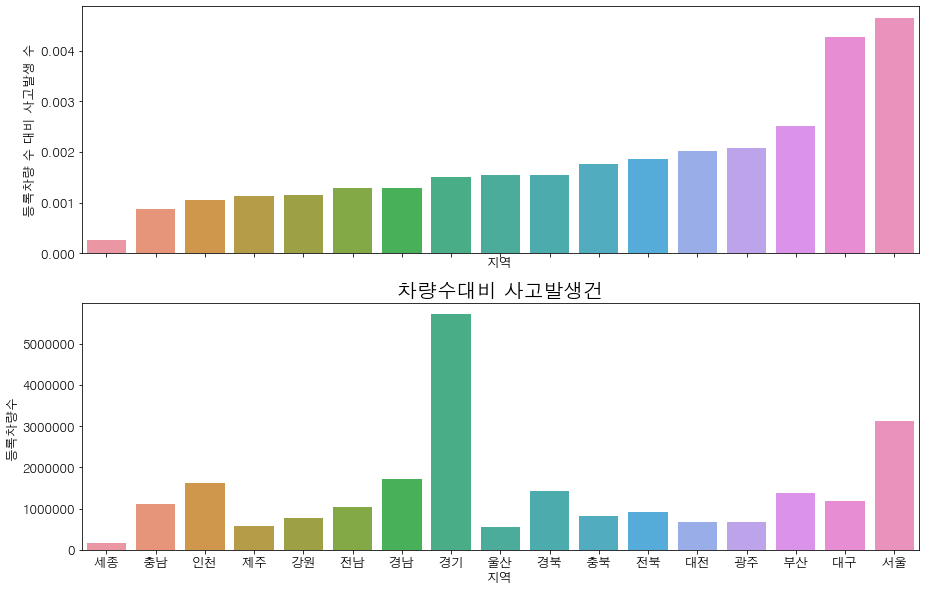

In [186]:
f, (ax1,ax2) = plt.subplots(2,1,figsize=(15, 10), sharex=True)
sns.barplot(x=pd_df.지역, y=pd_df.등록차량수별사고발생비율, ax=ax1)
sns.barplot(x=pd_df.지역, y=pd_df.등록차량수, ax=ax2)
ax1.set_ylabel('등록차량 수 대비 사고발생 수')
plt.title('차량수대비 사고발생건',size=20)

In [1]:
!pip install folium

In [23]:
import pandas as pd
import numpy as np
import folium


mapt = folium.Map(location=[36.5502, 127.5159933],zoom_start=6.5)

mapt

In [24]:
acc1 = pd.read_csv('./교통/도로교통공단_교통사고다발지역_20190725.csv', encoding='euc-kr', usecols=[5,12,13])
acc1

,사고지역위치명,위도,경도
0,서울특별시 종로구 혜화동(혜화초교 부근),37.588413,126.999607
1,서울특별시 성북구 종암동(숭례초교 부근),37.595505,127.035733
2,서울특별시 성북구 동소문동7가(정덕초교 부근),37.597571,127.014564
3,서울특별시 성북구 석관동(석관초교 부근),37.610429,127.059596
4,서울특별시 도봉구 쌍문동(쌍문초교 부근),37.648129,127.024430
5,서울특별시 노원구 상계동(동일초교 부근),37.664437,127.056828
6,서울특별시 구로구 개봉동(개봉초교 부근),37.489940,126.856930
7,서울특별시 구로구 개봉동(매봉초교 부근),37.503921,126.845831
8,서울특별시 송파구 방이동(방산초교 부근),37.509797,127.122101
9,부산광역시 남구 용호동(용호초교 부근),35.122549,129.109660


In [25]:
acc2 = pd.DataFrame({'사고지역위치명':acc1['사고지역위치명'], '위도':acc1['위도'], '경도':acc1['경도']})

map = folium.Map(location=[36.5502, 127.515993],zoom_start=6.5)

for n in range(0,1000):
    folium.Marker([acc2['위도'][n], acc2['경도'][n]]).add_to(map)
map

In [26]:
result2 = result.copy()
result2

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율,cctv대수별사고발생비율,인구수정규화,발생건수정규화,카메라대수정규화,인구대비사고발생건수,위도,경도
0,강원,12653,898,940,1.05,1540714,777558,0.001155,0.070971,1169.332661,0.061974,0.117337,58.284665,37.822800,128.155500
1,경기,107835,8631,9089,1.05,13176011,5710355,0.001511,0.080039,10000.000000,0.595652,1.000000,65.505410,37.413800,127.518300
2,경남,23077,2196,2316,1.05,3366286,1711514,0.001283,0.095160,2554.859737,0.151553,0.214003,65.235099,35.460600,128.213200
3,경북,24334,2234,2326,1.04,2668836,1437795,0.001554,0.091806,2025.526542,0.154175,0.225660,83.706904,36.491900,128.888900
4,광주,5227,1393,1472,1.06,1459486,672166,0.002072,0.266501,1107.684260,0.096135,0.048472,95.444561,36.348315,127.390594
5,대구,12521,5039,5298,1.05,2448666,1182351,0.004262,0.402444,1858.427410,0.347757,0.116113,205.785518,35.848987,128.728180
6,대전,4349,1358,1448,1.07,1481701,671788,0.002021,0.312256,1124.544447,0.093720,0.040330,91.651420,35.194012,128.101959
7,부산,11036,3476,3666,1.05,3425317,1385252,0.002509,0.314969,2599.661612,0.239890,0.102342,101.479659,33.348885,126.280975
8,서울,54584,14490,15432,1.07,9751415,3121140,0.004643,0.265462,7400.885594,1.000000,0.506181,148.593819,37.487935,126.857758
9,세종,1819,42,46,1.10,330298,157498,0.000267,0.023090,250.681333,0.002899,0.016868,12.715790,36.291500,127.281670


In [27]:
result2.index = ['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시', '서울특별시', '세종특별자치시', '울산광역시', '인천광역시',
       '전라남도', '전라북도', '제주특별자치도', '충청남도', '충청북도']
result2

,지역,카메라대수,발생건수,사상자수,사상자 비율,인구수,등록차량수,등록차량수별사고발생비율,cctv대수별사고발생비율,인구수정규화,발생건수정규화,카메라대수정규화,인구대비사고발생건수,위도,경도
강원도,강원,12653,898,940,1.05,1540714,777558,0.001155,0.070971,1169.332661,0.061974,0.117337,58.284665,37.822800,128.155500
경기도,경기,107835,8631,9089,1.05,13176011,5710355,0.001511,0.080039,10000.000000,0.595652,1.000000,65.505410,37.413800,127.518300
경상남도,경남,23077,2196,2316,1.05,3366286,1711514,0.001283,0.095160,2554.859737,0.151553,0.214003,65.235099,35.460600,128.213200
경상북도,경북,24334,2234,2326,1.04,2668836,1437795,0.001554,0.091806,2025.526542,0.154175,0.225660,83.706904,36.491900,128.888900
광주광역시,광주,5227,1393,1472,1.06,1459486,672166,0.002072,0.266501,1107.684260,0.096135,0.048472,95.444561,36.348315,127.390594
대구광역시,대구,12521,5039,5298,1.05,2448666,1182351,0.004262,0.402444,1858.427410,0.347757,0.116113,205.785518,35.848987,128.728180
대전광역시,대전,4349,1358,1448,1.07,1481701,671788,0.002021,0.312256,1124.544447,0.093720,0.040330,91.651420,35.194012,128.101959
부산광역시,부산,11036,3476,3666,1.05,3425317,1385252,0.002509,0.314969,2599.661612,0.239890,0.102342,101.479659,33.348885,126.280975
서울특별시,서울,54584,14490,15432,1.07,9751415,3121140,0.004643,0.265462,7400.885594,1.000000,0.506181,148.593819,37.487935,126.857758
세종특별자치시,세종,1819,42,46,1.10,330298,157498,0.000267,0.023090,250.681333,0.002899,0.016868,12.715790,36.291500,127.281670


In [191]:
# 인구밀도
map = folium.Map(location=[36.5502, 127.515993], zoom_start=6.5)
for n in result.index:
    folium.CircleMarker([result["위도"][n], result["경도"][n]],
                       radius=result["인구수"][n]*0.00001,
                       color="#3186cc", fill_color="#3186cc").add_to(map)
map

In [29]:
map = folium.Map(location=[36.5502, 127.515993], zoom_start=6.5)
for n in result.index:
    folium.CircleMarker([result["위도"][n], result["경도"][n]],
                       radius=result["인구대비사고발생건수"][n]*0.4,
                       color="#3186cc", fill_color="#3186cc").add_to(map)
map

In [47]:
data15 = read_csv('./교통/2015년_교통사망사고정보.csv', encoding='euc-kr', usecols=[3,5,6,14])
data16 = read_csv('./교통/2016년_교통사망사고정보.csv', encoding='euc-kr', usecols=[3,5,6,14])
data17 = read_csv('./교통/도로교통공단_전국사망교통사고_2017.csv', encoding='euc-kr', usecols=[3,5,6,14])
fdata=pd.concat([data15,data16,data17],ignore_index=True)
fdata['사망자비'] = fdata['사망자수']/fdata['사상자수']
fdata

,주야,사망자수,사상자수,사고유형,사망자비
0,주간,1,1,측면직각충돌,1.000000
1,야간,1,1,횡단중,1.000000
2,주간,1,1,길가장자리구역통행중,1.000000
3,야간,1,1,진행중 추돌,1.000000
4,주간,1,1,공작물충돌,1.000000
5,야간,3,4,진행중 추돌,0.750000
6,야간,1,1,공작물충돌,1.000000
7,야간,1,2,횡단중,0.500000
8,야간,1,2,주정차중 추돌,0.500000
9,야간,1,1,차도통행중,1.000000


In [43]:
fdata['사고유형'].unique()

array(['측면직각충돌', '횡단중', '길가장자리구역통행중', '진행중 추돌', '공작물충돌', '주정차중 추돌',
       '차도통행중', '정면충돌', '기타', '전도전복', '보도통행중', '도로이탈 기타', '도로이탈 추락',
       '차단기돌파', '주/정차차량 충돌', '추돌', '측면충돌', '전도', '후진중충돌', '전복', '철길건널목'],
      dtype=object)

In [48]:
daynight={'주간':0,'야간':1}
acci = {'측면직각충돌':0, '횡단중':1, '길가장자리구역통행중':2, '진행중 추돌':3, '공작물충돌':4, '주정차중 추돌':5,
       '차도통행중':6, '정면충돌':7, '기타':8, '전도전복':9, '보도통행중':10, '도로이탈 기타':11, '도로이탈 추락':12,
       '차단기돌파':13, '주/정차차량 충돌':14, '추돌':15, '측면충돌':16, '전도':17, '후진중충돌':18, '전복':19, '철길건널목':20}
fdata['주야'] = fdata['주야'].apply(lambda v: daynight.get(v,v))
fdata['사고유형'] = fdata['사고유형'].apply(lambda v: acci.get(v,v))
fdata

,주야,사망자수,사상자수,사고유형,사망자비
0,0,1,1,0,1.000000
1,1,1,1,1,1.000000
2,0,1,1,2,1.000000
3,1,1,1,3,1.000000
4,0,1,1,4,1.000000
5,1,3,4,3,0.750000
6,1,1,1,4,1.000000
7,1,1,2,1,0.500000
8,1,1,2,5,0.500000
9,1,1,1,6,1.000000


In [50]:
fdata.drop(['사망자수','사상자수'], axis = 1, inplace = True)

In [95]:
import tensorflow as tf
import numpy as np
from pandas.io.parsers import read_csv

#다변인 선형회귀 모델에 영향을 미치는 변인이 여러 개 일 때 사용하는 모델
model = tf.global_variables_initializer();

data = fdata
xy = np.array(data, dtype=np.str)

x_data = xy[:,:-1]
y_data = xy[:,[-1]] #status 값

X = tf.placeholder(tf.float32, shape=[None,2])
Y = tf.placeholder(tf.float32, shape=[None,1])
W = tf.Variable(tf.random_normal([2,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

hypothesis = tf.matmul(X, W) + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0005)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    cost_, hypo_, _ = sess.run([cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        print("#", step, "손실 비용: ", cost_)
        print("status: ", hypo_[0])

saver = tf.train.Saver()
save_path = saver.save(sess, "./saved.ckpt")
print('학습된 모델을 저장했습니다.')

# 0 손실 비용:  142.98698
status:  [0.26422113]
# 100 손실 비용:  0.4608581
status:  [0.4235357]
# 200 손실 비용:  0.43355316
status:  [0.41582465]
# 300 손실 비용:  0.4105083
status:  [0.40856558]
# 400 손실 비용:  0.38951004
status:  [0.40230682]
# 500 손실 비용:  0.37034473
status:  [0.39698142]
# 600 손실 비용:  0.3528187
status:  [0.3925244]
# 700 손실 비용:  0.33675757
status:  [0.38887474]
# 800 손실 비용:  0.32201368
status:  [0.38597545]
# 900 손실 비용:  0.30844843
status:  [0.38377273]
# 1000 손실 비용:  0.29594538
status:  [0.3822166]
# 1100 손실 비용:  0.2843972
status:  [0.38125992]
# 1200 손실 비용:  0.273708
status:  [0.38085845]
# 1300 손실 비용:  0.26379472
status:  [0.3809708]
# 1400 손실 비용:  0.25458148
status:  [0.38155842]
# 1500 손실 비용:  0.24600253
status:  [0.38258478]
# 1600 손실 비용:  0.23799802
status:  [0.38401598]
# 1700 손실 비용:  0.23051505
status:  [0.3858202]
# 1800 손실 비용:  0.2235066
status:  [0.38796762]
# 1900 손실 비용:  0.21692976
status:  [0.39043012]
# 2000 손실 비용:  0.21074691
status:  [0.39318207]
# 2100 손실 비용:  0.

In [94]:
print(saver)

In [85]:
data18 = read_csv('./교통/도로교통공단_전국_사망교통사고정보(2018).csv', encoding='euc-kr', usecols=[3,5,6,14])

In [86]:
fdata.rename(columns = {fdata.columns[0]:'daynight',fdata.columns[1]:'acc_cate',fdata.columns[2]:'dead'}, inplace = True)
data18.rename(columns = {data18.columns[0]:'daynight',data18.columns[1]:'acc_cate',data18.columns[2]:'dead'}, inplace = True)
fdata

,daynight,acc_cate,dead
0,0,0,1.000000
1,1,1,1.000000
2,0,2,1.000000
3,1,3,1.000000
4,0,4,1.000000
5,1,3,0.750000
6,1,4,1.000000
7,1,1,0.500000
8,1,5,0.500000
9,1,6,1.000000


In [87]:
# 플레이스 홀더를 설정합니다.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random_normal([2, 1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

# 가설을 설정합니다.
hypothesis = tf.matmul(X, W) + b

# 저장된 모델을 불러오는 객체를 선언합니다.
saver = tf.train.Saver()
model = tf.global_variables_initializer()


# 7가지 변수를 입력 받습니다.
daynight = 1
acc_cate = 1

with tf.Session() as sess:
    sess.run(model)
    save_path = "./saved.ckpt"
#    save_path2 = "./saved.cpkt2"
    saver.restore(sess, save_path)
#    saver.restore(sess, save_path2)

    data = ((daynight, acc_cate), )
    arr = np.array(data, dtype=np.float32)

    x_data = arr[0:2]
    dict = sess.run(hypothesis, feed_dict={X: x_data})

    print(dict[0])

NotFoundError: Restoring from checkpoint failed. This is most likely due to a Variable name or other graph key that is missing from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Key bias_2 not found in checkpoint
	 [[node save_5/RestoreV2 (defined at <ipython-input-87-f055943b4a3d>:11) ]]

Original stack trace for 'save_5/RestoreV2':
  File "C:\Users\student\Anaconda3\envs\multi\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\student\Anaconda3\envs\multi\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\student\Anaconda3\envs\multi\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\Users\student\Anaconda3\envs\multi\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\Users\student\Anaconda3\envs\multi\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\kernelbase.py", line 272, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\kernelbase.py", line 542, in execute_request
    user_expressions, allow_stdin,
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\interactiveshell.py", line 2855, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in _run_cell
    return runner(coro)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\interactiveshell.py", line 3058, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\interactiveshell.py", line 3249, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-87-f055943b4a3d>", line 11, in <module>
    saver = tf.train.Saver()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 825, in __init__
    self.build()
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 837, in build
    self._build(self._filename, build_save=True, build_restore=True)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 875, in _build
    build_restore=build_restore)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 508, in _build_internal
    restore_sequentially, reshape)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 328, in _AddRestoreOps
    restore_sequentially)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\training\saver.py", line 575, in bulk_restore
    return io_ops.restore_v2(filename_tensor, names, slices, dtypes)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\ops\gen_io_ops.py", line 1779, in restore_v2
    name=name)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\framework\ops.py", line 3616, in create_op
    op_def=op_def)
  File "C:\Users\student\Anaconda3\envs\multi\lib\site-packages\tensorflow\python\framework\ops.py", line 2005, in __init__
    self._traceback = tf_stack.extract_stack()


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# wine = pd.read_csv('winequality-red.csv', sep = ';')
fdata # 15~17 교통사고 자료

# y = wine["quality"]
y = fdata['주야']
# y = y.apply(lambda val: 0 if val <= 4 else (1 if val<=7 else 2))

# x = wine.drop("quality", axis=1)
x = fdata.drop(['주야'],axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)                   # 예측값
print(classification_report(y_test, y_pred))
print("정답률=", accuracy_score(y_test, y_pred)) #매우낮음

              precision    recall  f1-score   support

           0       0.61      0.49      0.55      1246
           1       0.59      0.70      0.64      1281

    accuracy                           0.60      2527
   macro avg       0.60      0.60      0.59      2527
weighted avg       0.60      0.60      0.59      2527

정답률= 0.5975464978235061


C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [60]:
!pip install ipywidgets

  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\1c\54\34\fd47cd9b308826cc4292b54449c1899a30251ef3b506bc91ea
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\bb\46\00\6d471ef0b813e3621f0abe6cb723c20d529d39a061de3f7c51
  Stored in directory: C:\Users\student\AppData\Local\pip\Cache\wheels\39\01\56\f1b08a6275acc59e846fa4c1e1b65dbc1919f20157d9e66c20
Successfully built prometheus-client pyrsistent pandocfilters


In [153]:
x_data

array([['0.0', '0.0'],
       ['1.0', '1.0'],
       ['0.0', '2.0'],
       ...,
       ['1.0', '12.0'],
       ['1.0', '7.0'],
       ['1.0', '1.0']], dtype='<U32')

In [167]:
X[y==0, 0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [168]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [163]:
x_data[:,0].astype('float64')

array([0., 1., 0., ..., 1., 1., 1.])

In [170]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
import matplotlib as mpl

data = fdata
xy = np.array(data, dtype=np.str)

x_data = xy[:,:-1]
# y_data = xy[:,[-1]] #status 값
y_data = (xy.index / 2).astype(np.int)

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(x_data, y_data)
    XX_min = min(x_data[:, 0]).astype('float64') - 1
    XX_max = max(x_data[:, 0]).astype('float64') + 1
    YY_min = min(x_data[:, 1]).astype('float64') - 1
    YY_max = max(x_data[:, 1]).astype('float64') + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(x_data[y_data==0, 0], x_data[y_data==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(x_data[y_data==1, 0], x_data[y_data==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("사망자수")
    plt.ylabel("사상자수")
    plt.title("교통사고 데이터")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

AttributeError: 'numpy.ndarray' object has no attribute 'index'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [154]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris
import matplotlib as mpl

iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X = iris.data[idx, :2]
y = (iris.target[idx] / 2).astype(np.int)

def plot_sgd(n):
    model = SGDClassifier(loss="modified_huber", max_iter=n, shuffle=False, n_iter_no_change=1e9).fit(X, y)
    XX_min = X[:, 0].min() - 1
    XX_max = X[:, 0].max() + 1
    YY_min = X[:, 1].min() - 1
    YY_max = X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.linspace(XX_min, XX_max, 1000),
                         np.linspace(YY_min, YY_max, 1000))
    ZZ = model.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    cmap = mpl.colors.ListedColormap(sns.color_palette("Set2"))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Set3)
    plt.scatter(X[y==0, 0], X[y==0, 1], c='w', s=100, marker='o', edgecolor='k')
    plt.scatter(X[y==1, 0], X[y==1, 1], c='k', s=100, marker='x', edgecolor='k')
    plt.xlabel("꽃받침의 길이")
    plt.ylabel("꽃받침의 폭")
    plt.title("붓꽃 데이터(setosa/virginica)")
    plt.xlim(XX_min, XX_max)
    plt.ylim(YY_min, YY_max)
    plt.grid(False)
    plt.show()


from ipywidgets import widgets
widgets.interact(plot_sgd, n=widgets.IntSlider(min=1, max=100, step=1, value=1));

interactive(children=(IntSlider(value=1, description='n', min=1), Output()), _dom_classes=('widget-interact',)…

C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


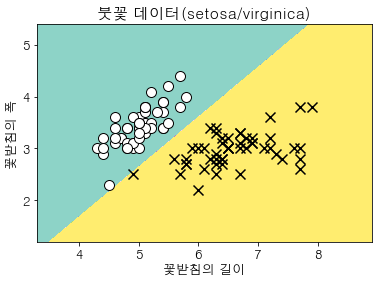

In [65]:
plot_sgd(400)

In [67]:
from sklearn.metrics import confusion_matrix
model = SGDClassifier(loss="modified_huber", max_iter=400, shuffle=False, n_iter_no_change=1e9).fit(X, y)
confusion_matrix(y, model.predict(X))

C:\Users\student\Anaconda3\envs\multi\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[50,  0],
       [ 0, 50]], dtype=int64)

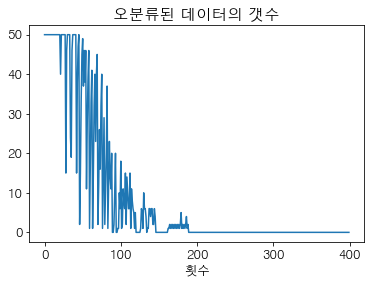

In [68]:
n = 400
loss = np.empty(n)
model = SGDClassifier(loss="modified_huber", shuffle=False)
for i in range(n):
    model.partial_fit(X, y, classes=[0, 1])
    loss[i] = np.sum(y != model.predict(X))

plt.plot(loss)
plt.xlabel("횟수")
plt.title("오분류된 데이터의 갯수")
plt.show()